# Import and Define Data Set

In [145]:
import math
import matplotlib.pyplot as plt
import numpy as np

training_set = np.genfromtxt("hw04_data_set_train.csv", delimiter = ",", skip_header=True)
test_set = np.genfromtxt("hw04_data_set_test.csv", delimiter = ",", skip_header=True)

N = training_set.shape[0]

x_train = np.zeros(N)
y_train = np.zeros(N)
x_test = np.zeros(N)
y_test = np.zeros(N)

x_train[:] = training_set[:,0]
y_train[:] = training_set[:,1]
x_test[:] = test_set[:,0]
y_test[:] = test_set[:,1]

In [147]:
min_val = min(x_train)
max_val = max(x_train)
print(min_val,max_val)

0.011111 1.988889


## Regressogram 

In [149]:
K = np.max(y_train)
N = training_set.shape[0]

bin_width = 0.1
origin = 0.0

left_borders = np.arange(min_val, max_val, bin_width)
right_borders = np.arange(min_val + bin_width, max_val + bin_width, bin_width)

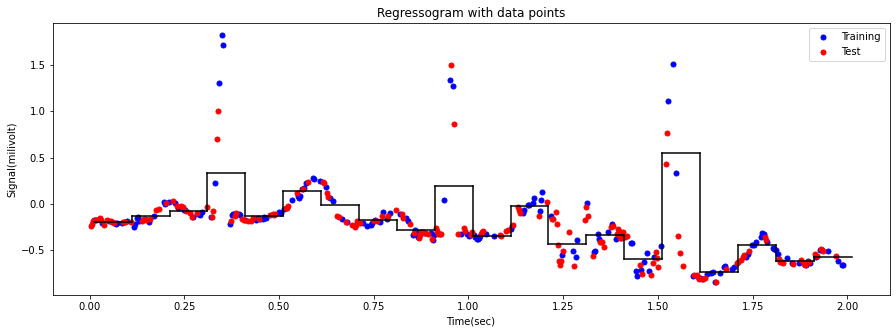

In [150]:
regressogram_results = np.zeros(len(left_borders))

for b in range(len(left_borders)):
    regressogram_results[b]= np.sum(((left_borders[b] < x_train) & (x_train <= right_borders[b]))*y_train) / np.sum((left_borders[b] < x_train) & (x_train <= right_borders[b]))
    

plt.figure(figsize = (15, 5))
plt.plot(x_train,y_train,"b.", markersize = 10,label="Training")
plt.plot(x_test,y_test,"r.", markersize = 10,label="Test")
    
for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [regressogram_results[b], regressogram_results[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [regressogram_results[b], regressogram_results[b + 1]], "k-")   


plt.xlabel("Time(sec)")
plt.ylabel("Signal(milivolt)")
plt.title("Regressogram with data points")

plt.legend(loc='upper right')
plt.show()


def get_bin_index(x):
    res = math.ceil((x-min_val) / bin_width)
    print(res)
    return res

### RMSE for regressogram 

In [155]:
rmse_reg = 0
for i in range(len(right_borders)):
    for j in range(len(y_test)):
        if x_test[j] <= right_borders[i] and left_borders[i] <= x_test[j]:
            rmse_reg = rmse_reg + (y_test[j] - regressogram_results[i])**2  #sum of (yi-yi_head)**2
N_test=test_set.shape[0]

rmse_reg = np.sqrt(rmse_reg/N_test)       #divide N_test and take square root
#print(rmse_reg)
print("Regressogram => RMSE is {} when h is 0.1".format(rmse_reg))

Regressogram => RMSE is 0.3271195664559576 when h is 0.1


## Running Mean Smoother

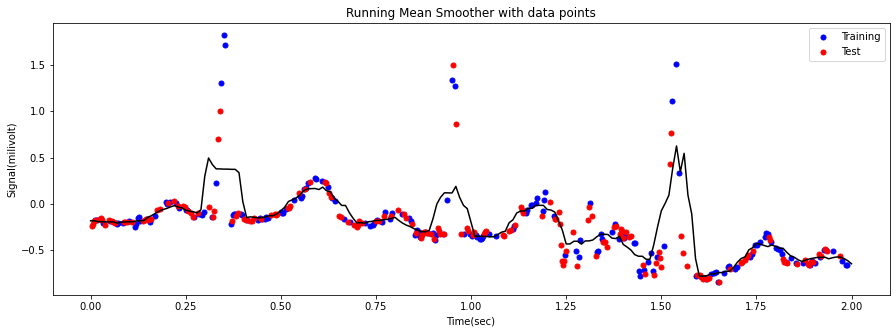

In [156]:
rms_results = np.zeros(201)  
data_interval = np.linspace(0, 2, 201)  
counter = 0
bin_width=0.1 #same
for x in data_interval:
    rms_results[counter] = np.sum((((x - 0.5 * bin_width) < x_train) & (x_train <= (x + 0.5 * bin_width)))*y_train) / np.sum(((x - 0.5 * bin_width) < x_train) & (x_train <= (x + 0.5 * bin_width)))
    counter += 1

plt.figure(figsize = (15, 5))
plt.plot(x_train,y_train,"b.", markersize = 10,label="Training")
plt.plot(x_test,y_test,"r.", markersize = 10,label="Test")
    
plt.plot(data_interval, rms_results, "k-")


plt.xlabel("Time(sec)")
plt.ylabel("Signal(milivolt)")
plt.title("Running Mean Smoother with data points")

plt.legend(loc='upper right')
plt.show()

### RMSE for running mean smoother

In [166]:
rmse_rms=0
for i in range(len(x_test)):
    rmse_rms += (y_test[i] - rms_results)**2
 
rmse_rms = np.sqrt(rmse_rms/N_test)
print("Running Mean Smoother => RMSE is {} when h is 0.1".format(rmse_rms[0]))

Running Mean Smoother => RMSE is 0.3295443331752694 when h is 0.1


## Kernel Smoother

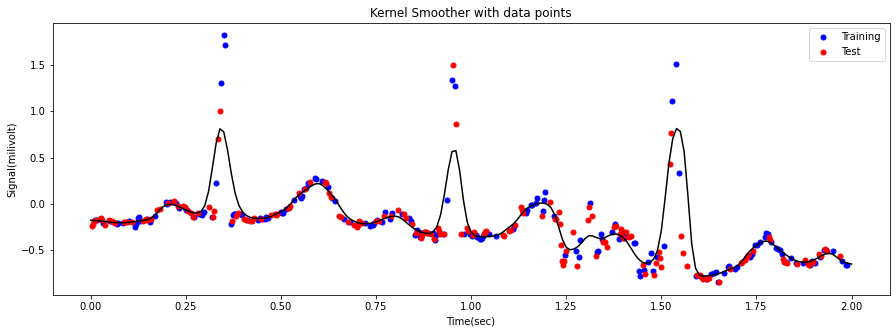

In [160]:
bin_width = 0.02

def k(u):
    return np.exp(-u**2/2)/np.sqrt(2*math.pi)

kernel_res = np.zeros(len(data_interval))

for i in range(len(data_interval)):
    kernel_res[i] = np.sum(k((data_interval[i] - x_train)/bin_width )*y_train) / np.sum(k((data_interval[i] - x_train)/bin_width ))

plt.figure(figsize = (15, 5))
plt.plot(x_train,y_train,"b.", markersize = 10,label="Training")
plt.plot(x_test,y_test,"r.", markersize = 10,label="Test")
    
plt.plot(data_interval, kernel_res, "k-")


plt.xlabel("Time(sec)")
plt.ylabel("Signal(milivolt)")
plt.title("Kernel Smoother with data points")

plt.legend(loc='upper right')
plt.show()

### RMSE for kernel smoother

In [163]:
rmse_kernel = 0
for i in range(len(x_test)):
    rmse_kernel += (y_test[i] - kernel_res)**2

rmse_kernel = np.sqrt(rmse_kernel/N_test)
print("Kernel Smoother => RMSE is {} when h is 0.02".format(rmse_kernel[0]))

Kernel Smoother => RMSE is 0.33108052473264177 when h is 0.02
